# Factors discretization

This notebook has been created for developing and testing methods of discretization for numeric variables

In [72]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import plotly.express as px

# Lests generate some random ranges which will be used as test data

Data building

In [73]:
# 3 differend data blobs
X,y = make_blobs(
    n_samples = 150, n_features = 1,
    centers = 3, cluster_std = 0.5,
    random_state=0
)

example_data = pd.DataFrame(
    {'var': X.ravel(), 'blob':y})

del X,y

Data visualisation

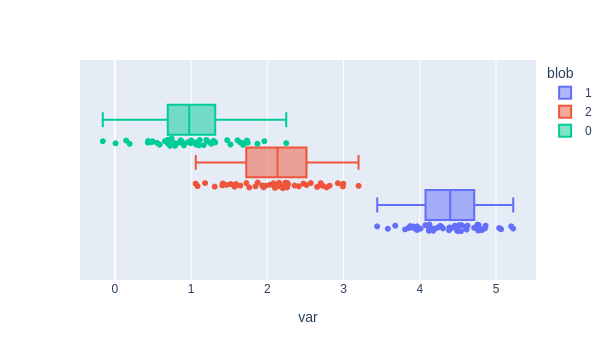

In [74]:
px.box(example_data, x = 'var', color = 'blob', points = 'all')

# First method - just applying KMeans to one range.

In [112]:
class kmeans_ranges():
    '''
        Applying the kmeans algorithm for 1 dimention data wich helps divide data into ranges.
    '''
    
    
    def __init__(self, max_clusters = 10, kmeans_kwarg = {}):
        '''
        inputs:
            max_clusters - maximum number of clusters wich will be fitted;
            kmeans_kwarg - optional arguments for kmeans class,
                            but arguments n_init, n_clusters and init
                            will be ignored.
        '''
        
        self.max_clusters = max_clusters
        self.kmeans_kwarg = kmeans_kwarg
        self.kmeans_insts = []
        
    def fit(self, var_range):
        
        self.kmeans_insts = []
    
        self.kmeans_kwarg['n_init'] = 1
        for n_clusters in range(1, self.max_clusters + 1):
            # inital clusters positions initialises as
            # as 1-st, 2-nd, ..., (n_clusters - 1)-s 
            # quatiles of n_clusters range
            self.kmeans_kwarg['init'] = np.quantile(
                var_range, 
                [[i/(n_clusters + 1)] for i in range(1, n_clusters + 1)]
            )
            self.kmeans_kwarg['n_clusters'] = n_clusters


            self.kmeans_insts.append(KMeans(
                **self.kmeans_kwarg
            ).fit(var_range))

        return self.kmeans_insts
        
my_ranges = kmeans_ranges()
my_ranges.fit(example_data['var'].to_numpy()[:, np.newaxis])

[KMeans(init=array([[2.1528934]]), n_clusters=1, n_init=1),
 KMeans(init=array([[1.58274681],
        [3.27860668]]), n_clusters=2, n_init=1),
 KMeans(init=array([[1.26107765],
        [2.1528934 ],
        [4.05883856]]),
        n_clusters=3, n_init=1),
 KMeans(init=array([[1.08072042],
        [1.75492982],
        [2.6727397 ],
        [4.2436179 ]]),
        n_clusters=4, n_init=1),
 KMeans(init=array([[0.98759919],
        [1.58274681],
        [2.1528934 ],
        [3.27860668],
        [4.39231107]]),
        n_clusters=5, n_init=1),
 KMeans(init=array([[0.88223829],
        [1.41375814],
        [1.92594407],
        [2.42120057],
        [3.89797409],
        [4.48728575]]),
        n_clusters=6, n_init=1),
 KMeans(init=array([[0.83815009],
        [1.26107765],
        [1.70435681],
        [2.1528934 ],
        [2.78264732],
        [4.05883856],
        [4.5252507 ]]),
        n_clusters=7, n_init=1),
 KMeans(init=array([[0.78650276],
        [1.16684521],
        [1.58274